In [ ]:
# Required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Loading the dataset
df = pd.read_csv("Housing.csv")

print(df.head())
print(df.info())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 colu

In [ ]:
# Converting categorical values to numerical
df['mainroad'] = df['mainroad'].map({'yes': 1, 'no': 0})
df['guestroom'] = df['guestroom'].map({'yes': 1, 'no': 0})
df['basement'] = df['basement'].map({'yes': 1, 'no': 0})
df['hotwaterheating'] = df['hotwaterheating'].map({'yes': 1, 'no': 0})
df['airconditioning'] = df['airconditioning'].map({'yes': 1, 'no': 0})
df['prefarea'] = df['prefarea'].map({'yes': 1, 'no': 0})
df = pd.get_dummies(df, columns=['furnishingstatus'],drop_first=True)


# Separating Target & Feature Variables
X = df[['area','bedrooms','bathrooms','stories','parking']]
y = df['price']


# Spllitiing the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)


# Model fitting
model = LinearRegression()
model.fit(X_train, y_train)


# Predicting
y_pred = model.predict(X_test)


# Evaluating the predictions
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 1173790361911.6228
R-squared: 0.5926486342834361


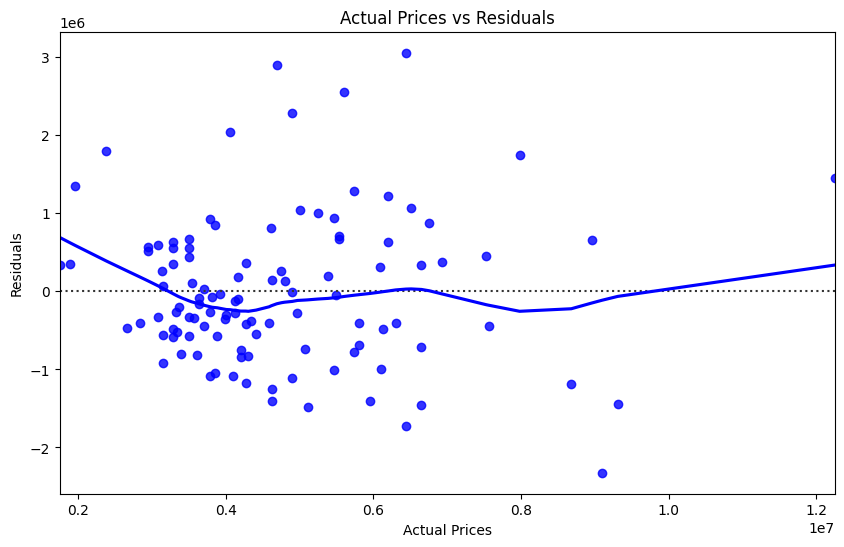

In [ ]:
# Residual plot
plt.figure(figsize=(10, 6))
sns.residplot(x=y_test, y=y_pred, lowess = True, color = 'blue')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title('Residual plot')
plt.show()

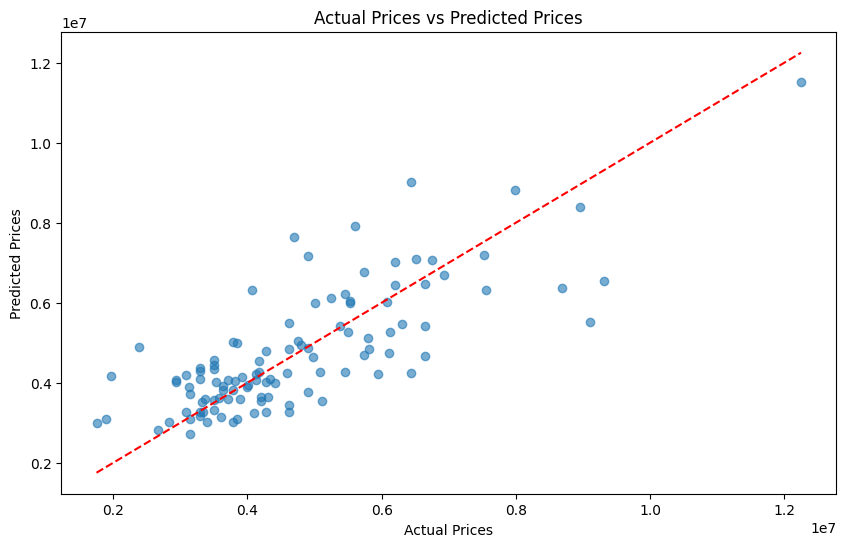

In [ ]:
# Actual Prices vs Predicted Prices plot

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()


In [ ]:
#  Taking user input
area = float(input("Enter the area of the house: "))
bedrooms = int(input("Enter the number of bedrooms: "))
bathrooms = int(input("Enter the number of bathrooms: "))
stories = int(input("Enter the number of stories: "))
parking = int(input("Enter the number of parking spaces: "))

# Inserting the user input into a data frame
user_df = pd.DataFrame([[area, bedrooms, bathrooms, stories, parking]],
                       columns = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking'])

# predicting the target variable
predicted_price = model.predict(user_df)

print("Predicted Price:", predicted_price[0])

Enter the area of the house: 2300
Enter the number of bedrooms: 5
Enter the number of bathrooms: 6
Enter the number of stories: 5
Enter the number of parking spaces: 3
Predicted Price: 12345256.907054704
